# Sales Prediction Using Python


## Task 2
## Muhammad Areeb Alam @ Codsoft

### Importing Necessary Libraries

In [15]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Importing The Dataset

In [2]:
ads = pd.read_csv('advertising.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Facts and Features of the Dataset

In [3]:
# Number of rows and columns (rows, columns)
ads.shape

(200, 4)

In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Null Values In The Dataset

In [6]:
ads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Exploratory Data Analysis

### Box Plot
#### Done To Find Outliers

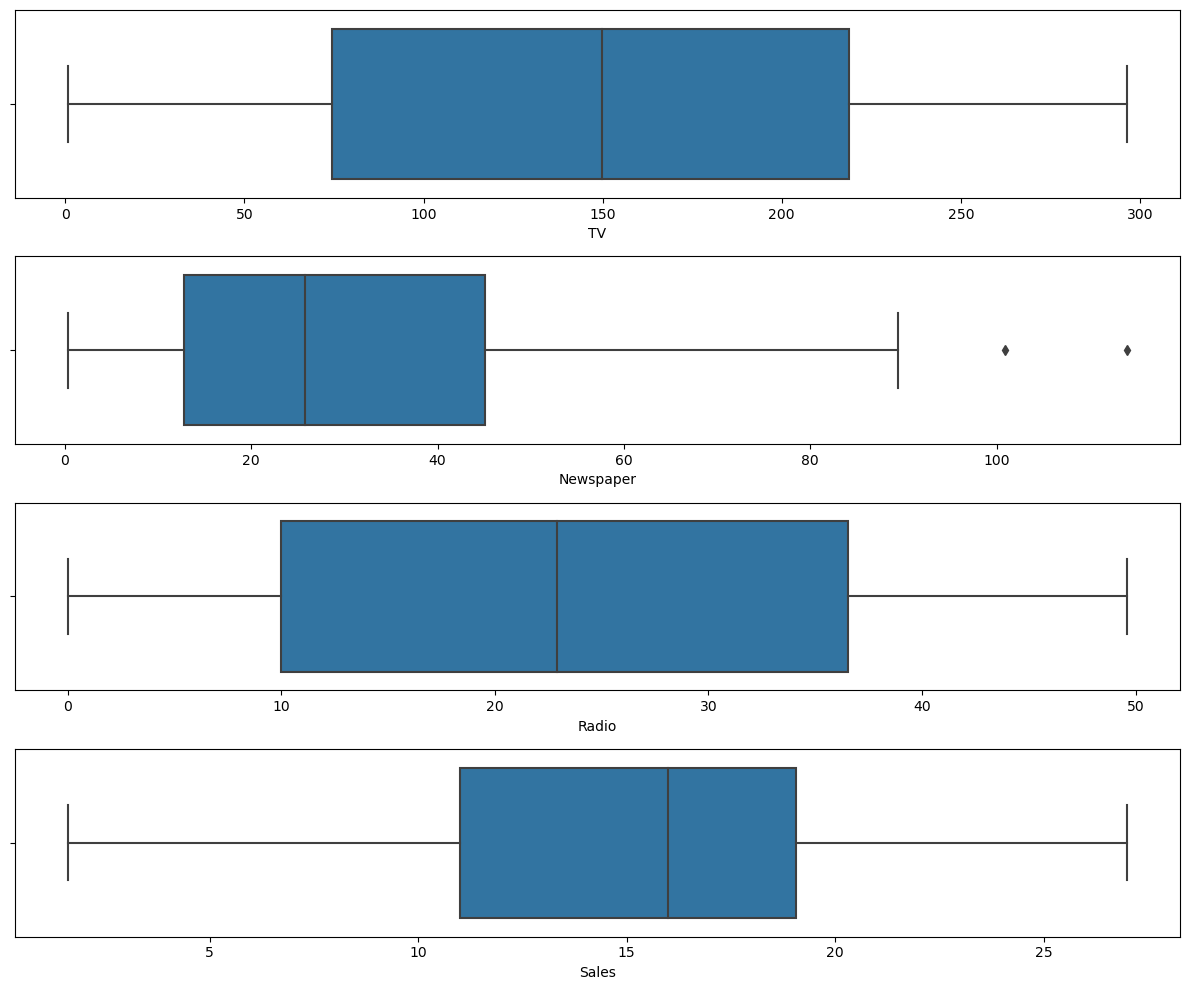

In [7]:
Analysisfig, axs = plt.subplots(4, figsize = (12,10))
plt1 = sns.boxplot(ads['TV'], ax = axs[0])
plt2 = sns.boxplot(ads['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(ads['Radio'], ax = axs[2])
plt4 = sns.boxplot(ads['Sales'], ax = axs[3])
plt.tight_layout()

plt.show()

### Scatter Plot

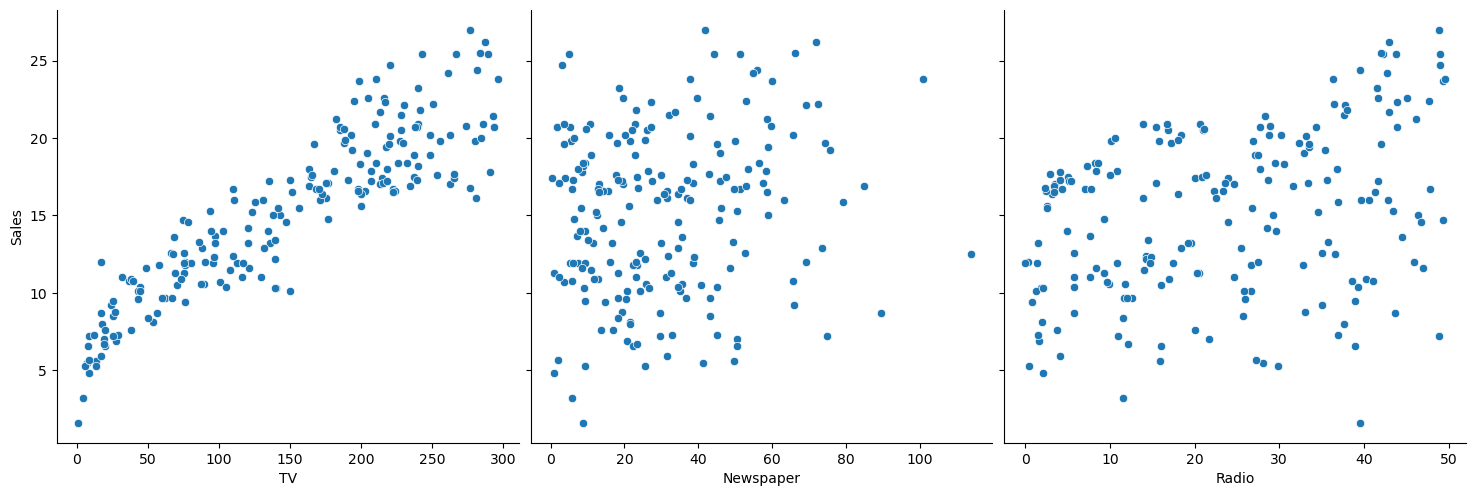

In [8]:
sns.pairplot(ads, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

##### The Scatter Plot shows the relationship of sales with every entity. The plot potrays that the relationship of sales is the strongest and linear with TV, moderate with Radio and the weakest with Newspaper

### Correlation Heatmap

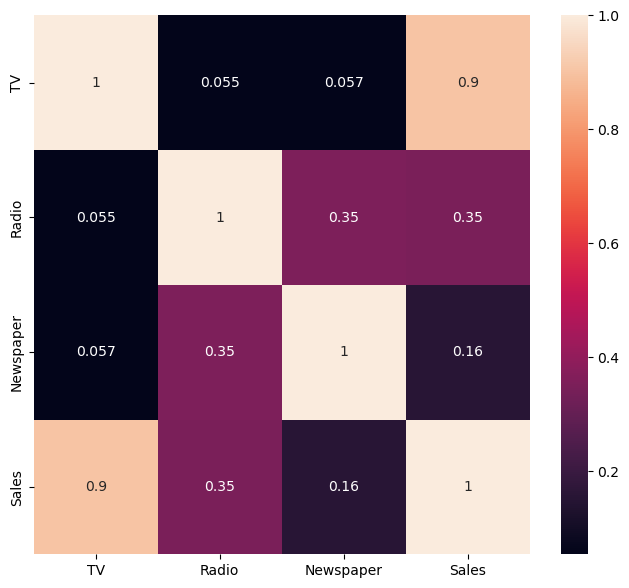

In [9]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(ads.corr(), annot = True)
plt.show()

##### This Heatmap further strengthens our result from the scatter plot above that the relationship of Sales is the Strongest with TV

### Train Test Split

In [10]:
X = ads['TV']
y = ads['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [11]:
X_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [12]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

### Model Building


### Using Linear Regression

In [17]:
# Create and fit the linear regression model
model = LinearRegression()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error (MAE): 1.905152391298234
Mean Squared Error: 5.34850349246385
R-squared: 0.7281352744078883


###  Visualizing Linear Regression Model

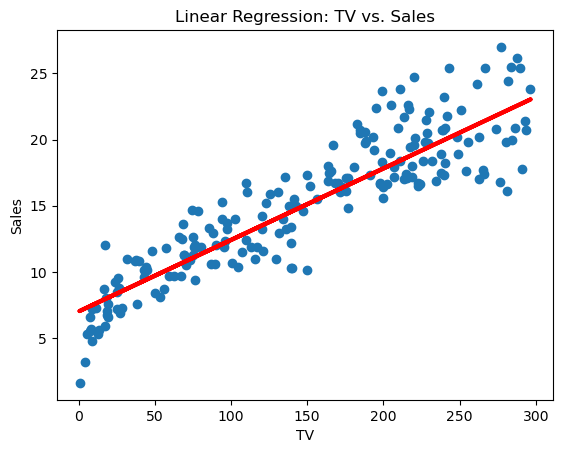

In [26]:
plt.scatter(ads['TV'], ads['Sales'])
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression: TV vs. Sales')
plt.show()

### Model Prediction

In [33]:
new_input = pd.DataFrame({
    'TV': [151.5],          # Replace with the value
})

# Make predictions on the input data
predictions = model.predict(new_input)

# Print the predicted rating
print("Predicted Sales:", predictions[0])

Predicted Sales: 15.192513532650473
